| Date                      | Open    | High    | Low     | Close   | Volume   | Dividends   | Stock Splits   |
|:--------------------------|:--------|:--------|:--------|:--------|:---------|:------------|:---------------|
| 2010-07-19 00:00:00-04:00 | 1.42467 | 1.48333 | 1.39467 | 1.46067 | 37297500 | 0           | 0              |
| 2010-07-20 00:00:00-04:00 | 1.45667 | 1.45667 | 1.33667 | 1.35333 | 27379500 | 0           | 0              |
| 2010-07-21 00:00:00-04:00 | 1.37733 | 1.39333 | 1.3     | 1.348   | 18787500 | 0           | 0              |
| 2010-07-22 00:00:00-04:00 | 1.36667 | 1.41667 | 1.358   | 1.4     | 14367000 | 0           | 0              |
| 2010-07-23 00:00:00-04:00 | 1.41267 | 1.43733 | 1.404   | 1.41933 | 9804000  | 0           | 0              |
| Date       | Revenue   |
|:-----------|:----------|
| 2006-01-31 | 1667      |
| 2005-10-31 | 534       |
| 2005-07-31 | 416       |
| 2005-04-30 | 475       |
| 2005-01-31 | 709       |


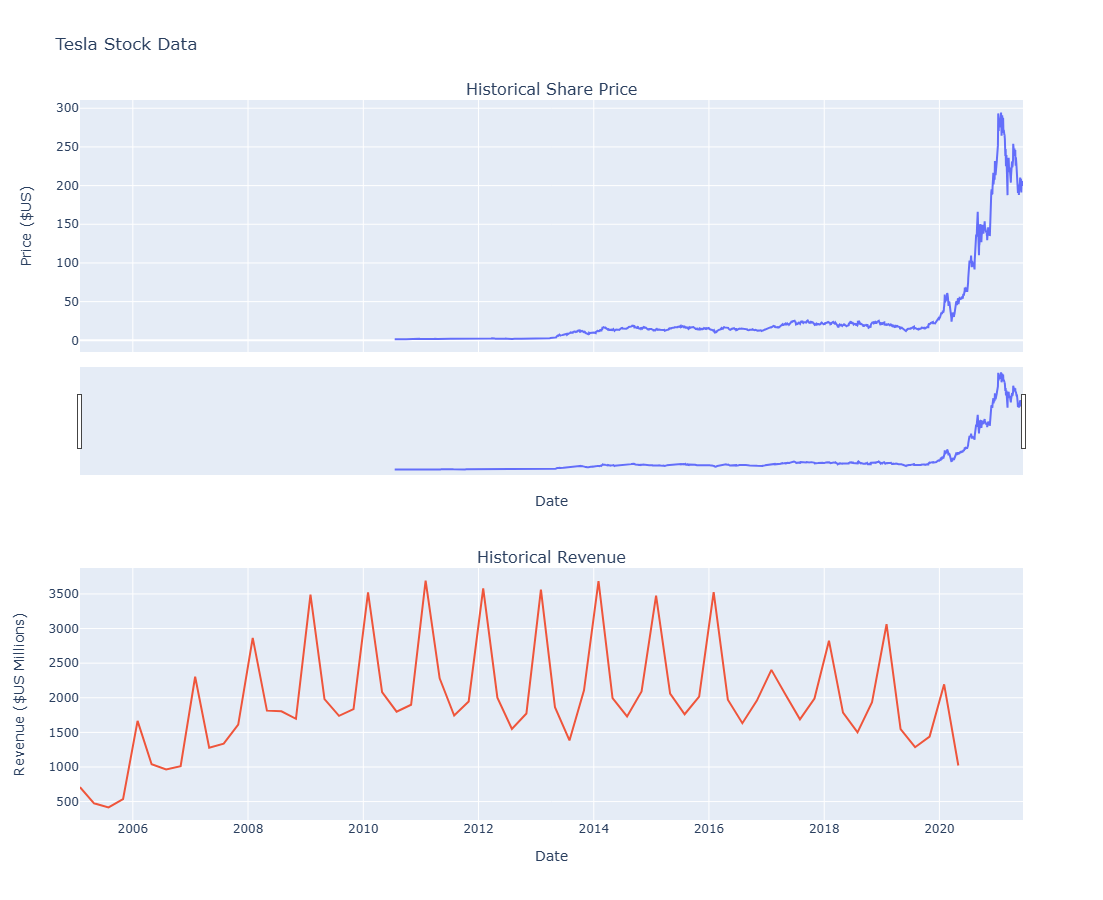

In [33]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install lxml html5lib

#Importing Requests
import yfinance as yf 
import pandas as pd 
import requests 
from bs4 import BeautifulSoup
import html5lib
import lxml
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
#Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
#Creating Ticker object for Tesla 
tsla = yf.Ticker("TSLA")
#Extracting Historical Stock Data
tsla_data = tsla.history(period="14y")
#Reseting index and display for first 5 rows 
tsla_data.reset_index(inplace=True)
print(tsla_data.head().to_markdown(index=False, numalign="left", stralign="left"))
#Download webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data = response.text

soup = BeautifulSoup(html_data, 'html.parser')

#Extract table rows
table_rows = soup.find_all("tbody")[1].find_all('tr')

#Create lists to store data
dates = []
revenues = []

#Loop through rows and extract data
for row in table_rows:
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$","").replace(",", "")
    dates.append(date)
    revenues.append(revenue)

#Create DataFrame
import pandas as pd
tsla_revenue = pd.DataFrame({"Date": dates, "Revenue": revenues})

#Removing the comma and dollar sign
tsla_revenue["Revenue"] = tsla_revenue['Revenue'].str.replace(',|\$',"")
#Removing a null or empty strings in Revenue Column
tsla_revenue.dropna(inplace=True)

tsla_revenue = tsla_revenue[tsla_revenue['Revenue'] != ""]
#Display last 5 rows of the DataFrame
print(tsla_revenue.tail().to_markdown(index=False, numalign="left", stralign="left"))

# Filter data up to June 2021
tsla_data = tsla_data[tsla_data['Date'] <= '2021-06-30']
tsla_revenue = tsla_revenue[tsla_revenue['Date'] <= '2021-06-30']

# Plot the graph using make_graph
make_graph(tsla_data, tsla_revenue, 'Tesla Stock Data')

| Date                      | Open    | High    | Low     | Close   | Volume   | Dividends   | Stock Splits   |
|:--------------------------|:--------|:--------|:--------|:--------|:---------|:------------|:---------------|
| 2002-07-17 00:00:00-04:00 | 1.3668  | 1.40131 | 1.20352 | 1.35417 | 6398400  | 0           | 0              |
| 2002-07-18 00:00:00-04:00 | 1.35418 | 1.38027 | 1.34323 | 1.34997 | 1261600  | 0           | 0              |
| 2002-07-19 00:00:00-04:00 | 1.34239 | 1.34744 | 1.31714 | 1.32808 | 1353600  | 0           | 0              |
| 2002-07-22 00:00:00-04:00 | 1.32303 | 1.38616 | 1.31294 | 1.32977 | 999200   | 0           | 0              |
| 2002-07-23 00:00:00-04:00 | 1.33818 | 1.38027 | 1.28348 | 1.3466  | 2536000  | 0           | 0              |
| Date       | Revenue   |
|:-----------|:----------|
| 2006-01-31 | 1667      |
| 2005-10-31 | 534       |
| 2005-07-31 | 416       |
| 2005-04-30 | 475       |
| 2005-01-31 | 709       |


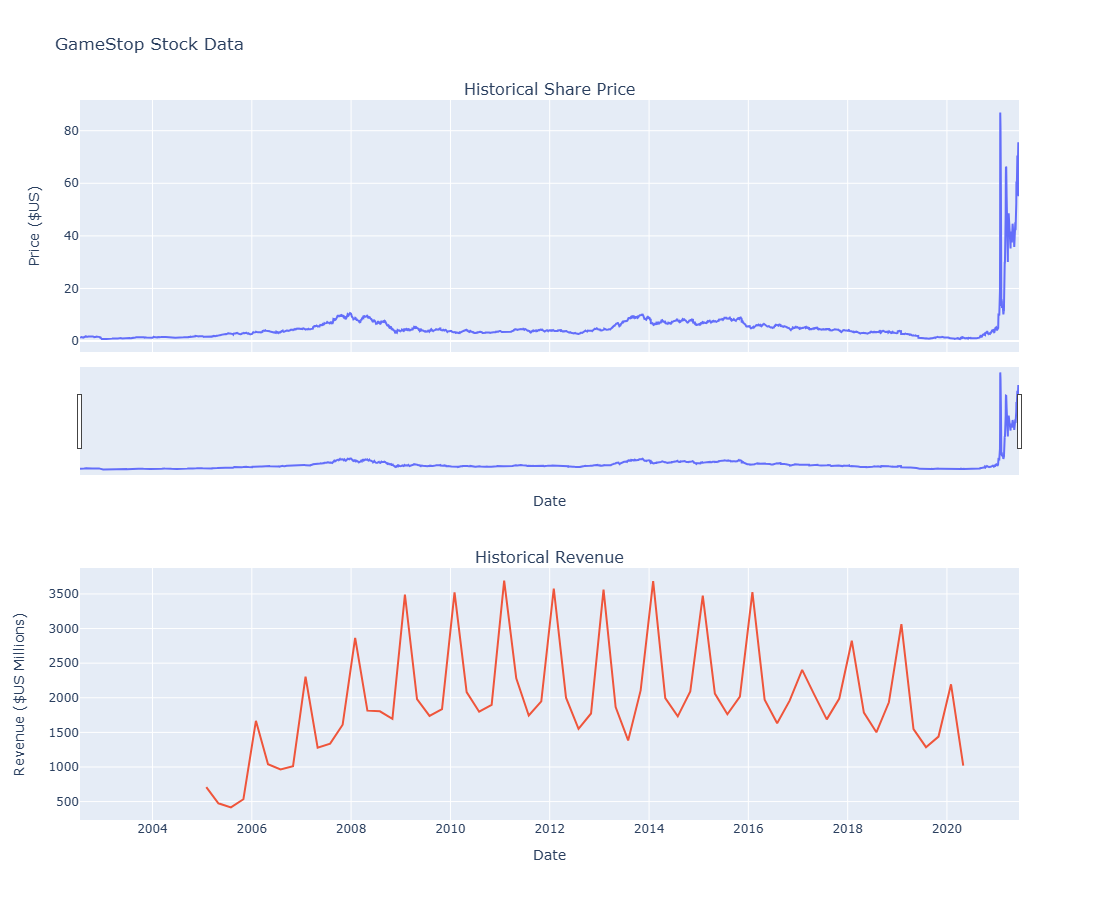

In [37]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat
!pip install yfinance
!pip install bs4
!pip install nbformat
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

#Creating ticker for Gamestop 
gme = yf.Ticker("GME")

#Extracting historical stock data
gme_data = gme.history(period="22y")

#Reseting index and display for first 5 rows 
gme_data.reset_index(inplace=True)
print(gme_data.head().to_markdown(index=False, numalign="left", stralign="left"))
#Download webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text
#Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser')
# Extract table rows
table_rows = soup.find_all("tbody")[1].find_all('tr')

# Create lists to store data
dates = []
revenues = []

# Loop through rows and extract data
for row in table_rows:
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$","").replace(",", "")
    dates.append(date)
    revenues.append(revenue)

# Create DataFrame
import pandas as pd
gme_revenue = pd.DataFrame({"Date": dates, "Revenue": revenues})
# Display last 5 rows of the DataFrame
print(gme_revenue.tail().to_markdown(index=False, numalign="left", stralign="left"))

# Filter data up to June 2021
gme_data = gme_data[gme_data['Date'] <= '2021-06-30']
gme_revenue = gme_revenue[gme_revenue['Date'] <= '2021-06-30']

# Plot the graph using make_graph
make_graph(gme_data, gme_revenue, 'GameStop Stock Data')